<a href="https://colab.research.google.com/github/VivekKamisetty/cs666student/blob/main/CS666_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Vivek Kamisetty

In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.5 MB/s eta 0:00:00


In [3]:
import mne
from mne.datasets import sample


In [4]:
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 983GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [13]:
from functools import total_ordering
#Task 1: Analyze the data. [20 Points]
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER

number_of_EEG_channels = 60
#print(raw)

# TODO What is the sampling frequency of this data?
# TODO: YOUR ANSWER
SAMPLING_FREQUENCY = 600
# TODO What is the total duration of the measurement?
# TODO: YOUR ANSWER
total_duration = 278

376


In [ ]:
raw.info

Using matplotlib as 2D backend.


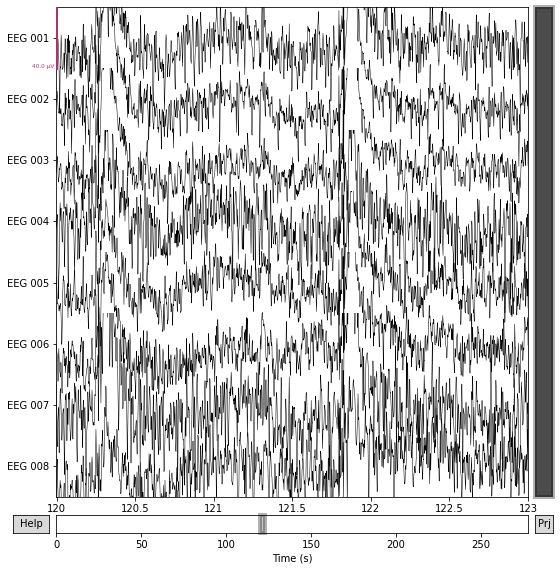

In [7]:
#Task 2: Let's look at some channels! [20 Points]Task 2: Let's look at some channels! [20 Points]
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)



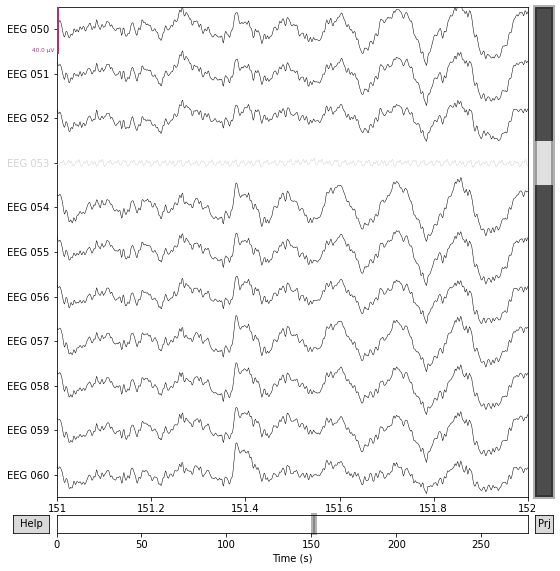

In [8]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.

ch1 = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs1 = [raw.ch_names.index(ch) for ch in ch1]
ecg50to60 = raw.plot(order=chan_idxs1, start=151, duration=1)

In [ ]:
# TODO: Do you see a bad channel? If yes, which one?
#Yes, we can clearly see a bad channel and the channel_number = EEG 053


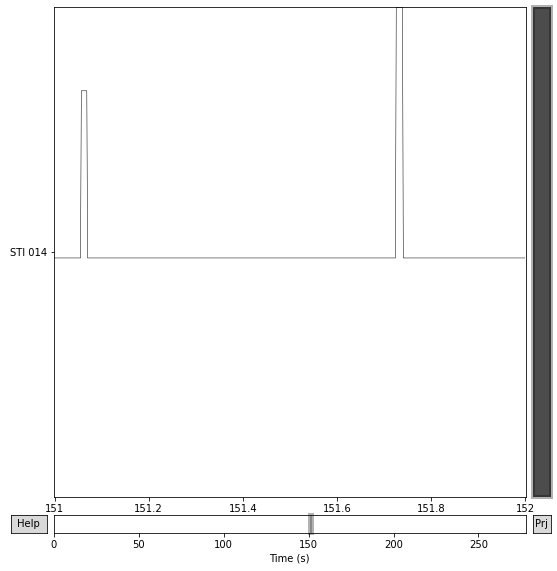

In [11]:
#Task 3: How long between event and brain activity? [25 Points]
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

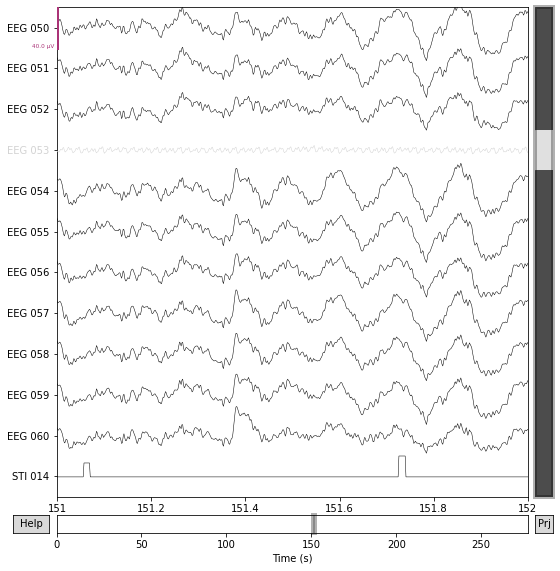

In [12]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.
ch2 = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060', 'STI 014']
chan_idxs2 = [raw.ch_names.index(ch) for ch in ch2]
ecg_with_stim = raw.plot(order=chan_idxs2, start=151, duration=1)

In [26]:
# How many stimulus events do you observe?
#2

# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: The initial stimulus was initiated at 151.1 seconds and the brain activity response was observed at 151.4 seconds, resulting in a difference of 
# 0.3 seconds

In [27]:
#Task 4: Localize different brain waves for different stimuli! [35 Points]
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


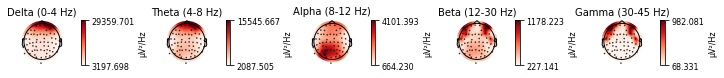

In [28]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


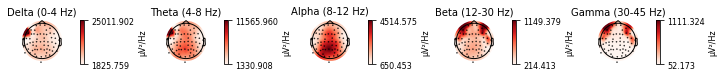

In [29]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


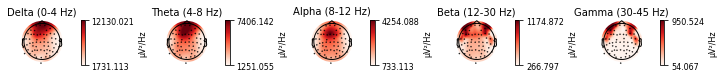

In [30]:
# TODO Please visualize the average brain activity when the subject pushes the button
button_activity = epochs['button'].plot_psd_topomap()

In [31]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
### Delta, Theta, Beta and Gamma are similar for the visual and button activity but only the alfpha of the button activity are opposite when compared with
### the alpfhas' of visual and face activity

# TODO Which brain region seems active during the button event?
### front region (Alpha)


320 events found
Event IDs: [ 1  2  3  4  5 32]
Event types: {32, 1, 2, 3, 4, 5}


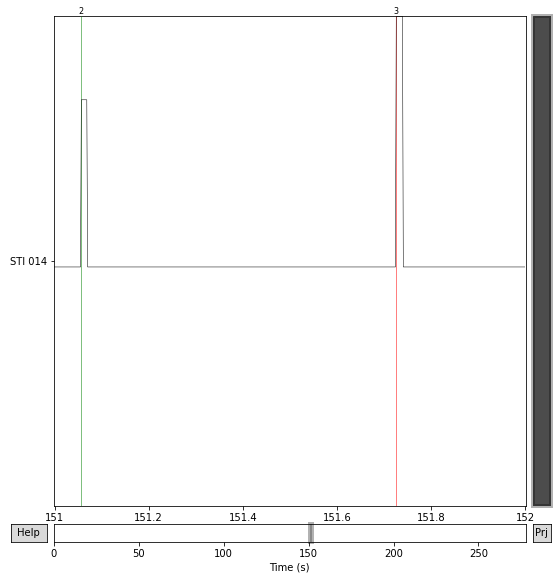

In [17]:
#Bonus Task: What type of event happened in Task 3? [33 Points]
# TODO Please go back to Task 3. Can you figure out which event types happened?
events = mne.find_events(raw)

event_types = set(events[:, 2])
print('Event types:', event_types)

event_color = {1 : 'blue', 2 : 'green', 3 : 'red', 4 : 'black', 5 : 'yellow', 32 : 'grey'}
chan_idxs_activity = raw.plot(order = chan_idxs, start = 151, duration = 1, events = events, event_color = event_color)

#So here the green and red lines corresponds to auditory/right and visual/Left events respectively.